# Stroke Prediction

Author: Mukhriddin Bakhramov

# Imports

In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import set_config
set_config(display='diagram')


# Scikit-Learn estimators 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score, f1_score,mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

# Load the Data

In [3]:
# Stroke Prediction Dataset
# lets load our data
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Stroke Prediction


* A Stroke is a health condition that causes damage by tearing the blood vessels in the brain. It can also occur when there is a halt in the blood flow and other nutrients to the brain. According to the World Health Organization (WHO), stroke is the leading cause of death and disability globally, This model will try to predict if a person will have stroke or not

* Each row represents a person's features

* This Model will solve a Classification Problem

* There area 11 Feature Matrices in this dataset excluding Target Vector

* This dataset contains 5110 rows

* I find this Dataset to be challenging because the ratio between target distribution is almost 9:1 in favor of 0's as opposed to 1's

In [7]:
missing_value = stroke_df['bmi'].isna().sum()
total_len = len(stroke_df['bmi'])

percentage_of_missing = (missing_value/total_len)*100
percentage_of_missing

3.9334637964774952

In [8]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "object":
        print(f"{stroke_df[col].value_counts()}\n\n")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Yes    3353
No     1757
Name: ever_married, dtype: int64


Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




In [9]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "float64" or stroke_df[col].dtype == "int64":
        print(f"{stroke_df[col].value_counts()}\n\n")

9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: id, Length: 5110, dtype: int64


78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64


0    4612
1     498
Name: hypertension, dtype: int64


0    4834
1     276
Name: heart_disease, dtype: int64


93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64


28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


0    4861
1     249
Name: stroke, dtype: int64




In [10]:
#check for duplicate
stroke_df.duplicated().sum()

0

* Dropped the id and ever_married columns since it's not providing any value to our prediction

In [11]:
# Drop id column for irrelevant data
stroke_df.drop(columns=['id','ever_married'],inplace=True)

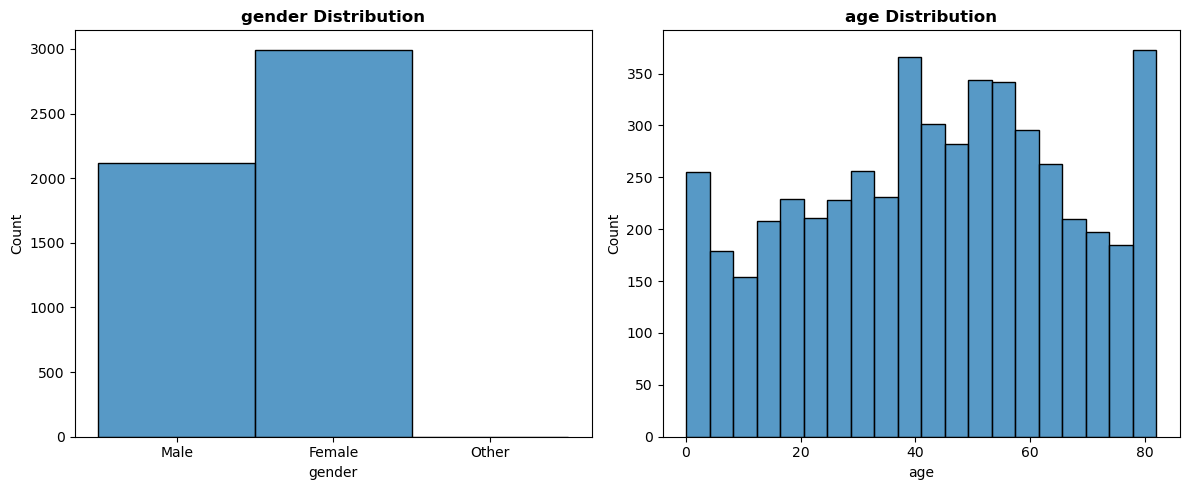

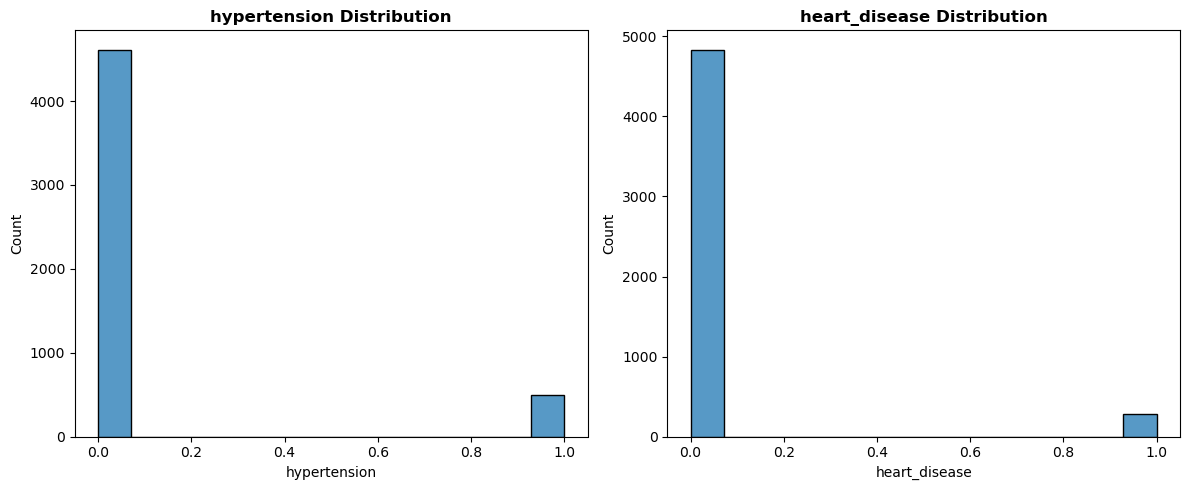

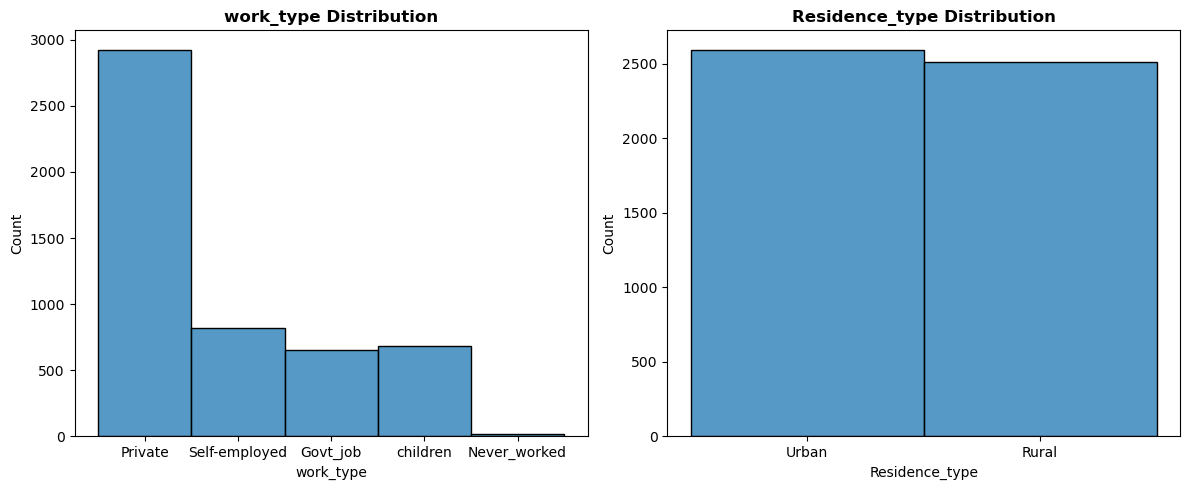

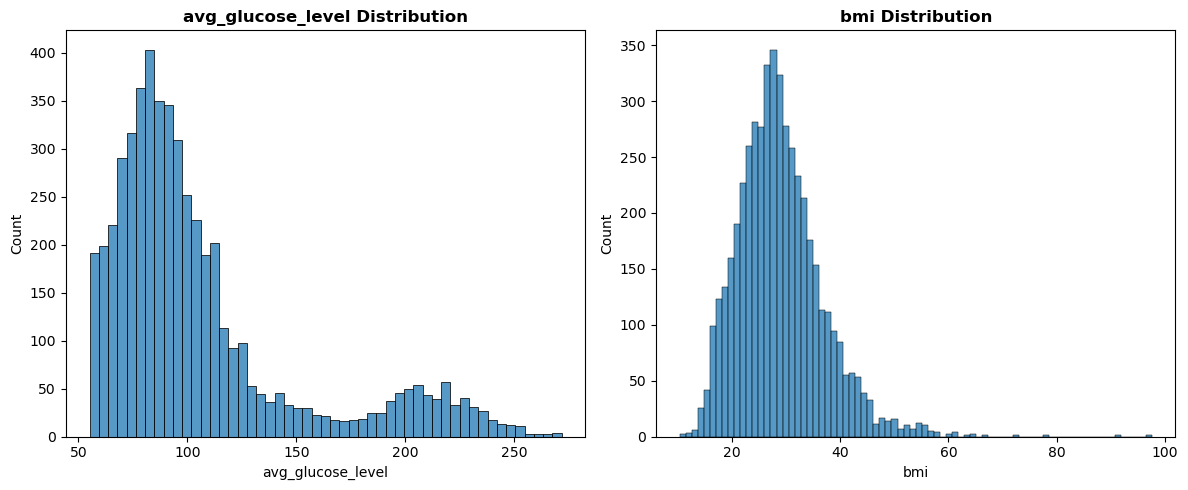

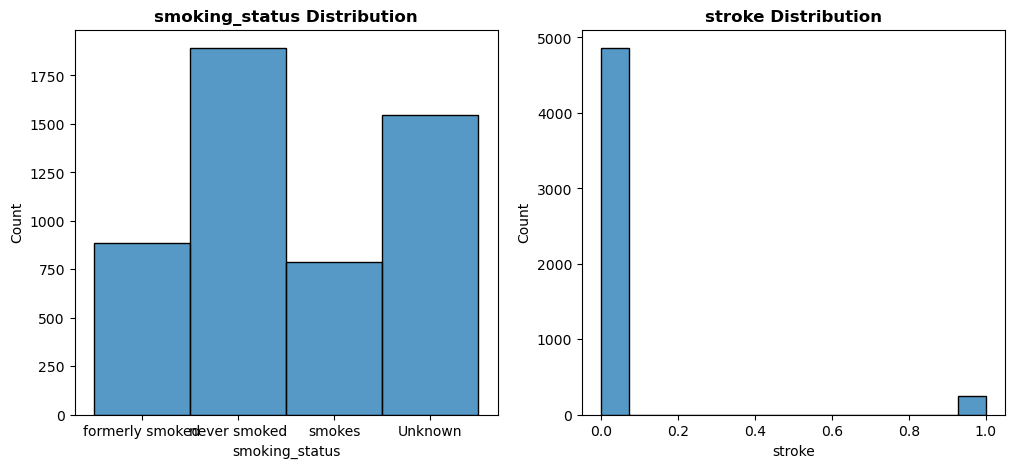

In [12]:
col_ax = 0
row_limit = 4
counter = 0
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
# Iterate to all features and display Historgram
for col in stroke_df.columns:
    # Set Historgram 
    ax=sns.histplot(data=stroke_df, x=col, ax=axes[col_ax])
    axes[col_ax].set_title(col+" Distribution", fontweight="bold")
    
    # Display every 2 cols and set new fig
    if col_ax == 1 and counter != row_limit:
        fig.tight_layout()
        fig, axes = plt.subplots(ncols=2, figsize=(12,5))
        col_ax = 0
        counter += 1
    else:
        col_ax += 1

* Here we can see the Distributions for all features and target
* bmi seemed to have impossible value but upon further research, there was a  record in the past of bmi went as high as 105
* gender have another data point called other that we need to look into
* smoking_status have a lot of unknown that we need to handle during preprocessing

In [13]:
# Create filter for other
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,Private,Rural,143.33,22.4,formerly smoked,0


* dropping the gender other since it's insignificant value and outlier in our dataset

In [14]:
# Drop index where other is located
stroke_df.drop(index=3116,inplace=True)

In [15]:
# duble check
stroke_df[stroke_df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [16]:
stroke_df.corr()

/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_6972/616460088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stroke_df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.333314,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.167770,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.041322,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.175672,0.131991
bmi,0.333314,0.167770,0.041322,0.175672,1.000000,0.042341
stroke,0.245239,0.127891,0.134905,0.131991,0.042341,1.000000


/var/folders/bd/fvqpk7z56rx6hbh4dzm7dmc80000gn/T/ipykernel_6972/2791898709.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stroke_df.corr(), annot=True);


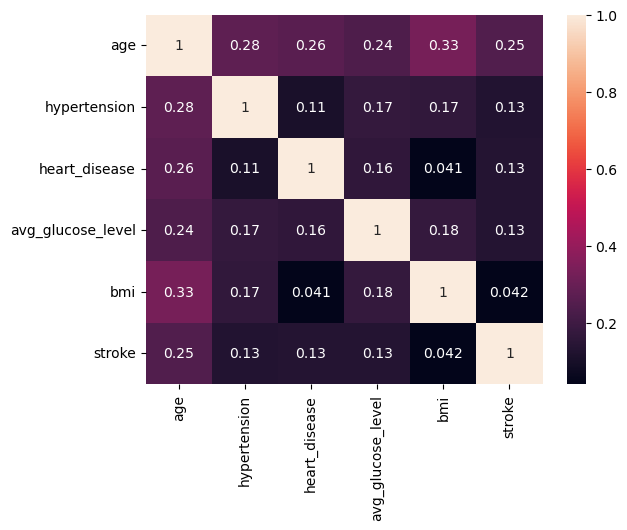

In [17]:
sns.heatmap(stroke_df.corr(), annot=True);

Text(0.5, 1.0, 'BMI based on Age')

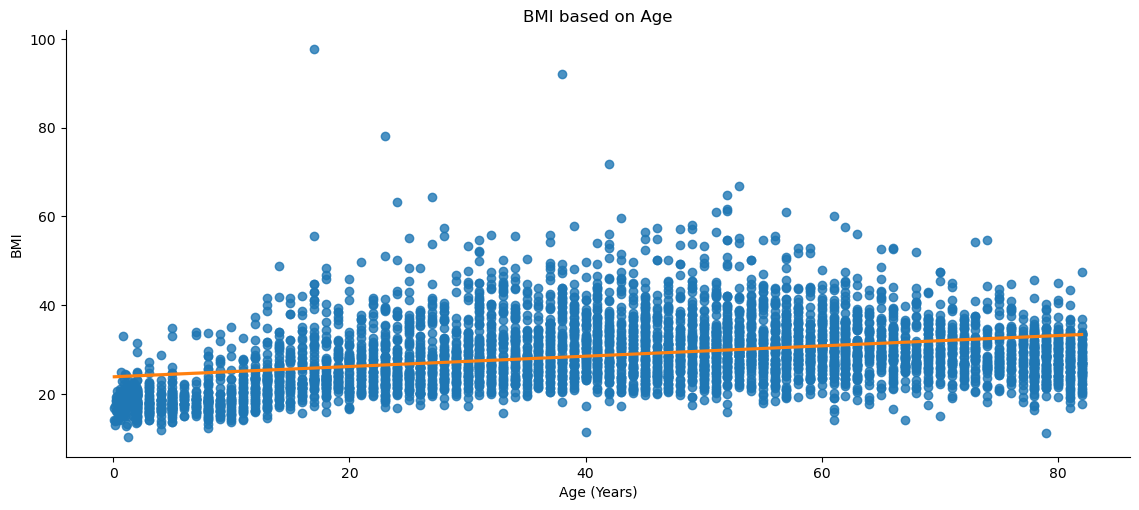

In [18]:
sns.lmplot(data=stroke_df, x='age', y="bmi", line_kws={"color": "C1"},height=5, aspect=2.3);
plt.xlabel("Age (Years)")
plt.ylabel("BMI")
plt.title("BMI based on Age")

### From chart above we can see BMI increases by AGE!

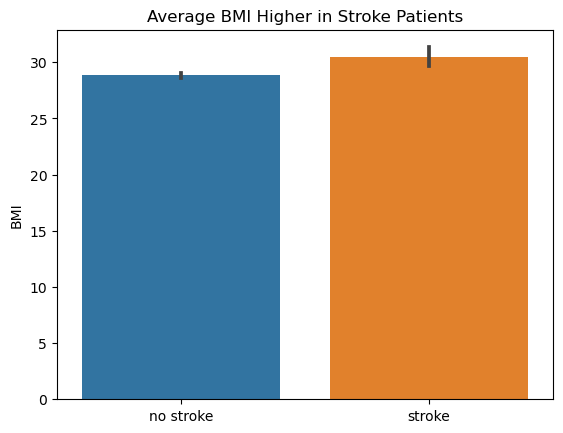

In [19]:
sns.barplot(data=stroke_df, x='stroke', y='bmi');

xticks = plt.xticks()[0]
plt.xticks(xticks, ['no stroke', 'stroke'])

plt.xlabel("")
plt.ylabel("BMI")

plt.title("Average BMI Higher in Stroke Patients")
plt.show()

### from this char above we can see patient who has a stroke has higher BMI

### Pre-processor

In [20]:
# lets check for missing values
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
# lets check missing values percentage
total_sum = len(stroke_df['bmi'])
miss_sum = stroke_df['bmi'].isna().sum()
print((miss_sum/total_sum)*100)

3.9342337052260716


In [22]:
# now lets fill our missing values with most frequent (mode)
bmi_mode = stroke_df['bmi'].mode()[0]
stroke_df['bmi'].fillna(bmi_mode, inplace=True)
stroke_df['bmi'].isna().sum()

0

In [23]:
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [24]:
cols = stroke_df.columns

for col in cols:
    if stroke_df[col].dtype == "object":
        print(f"{stroke_df[col].value_counts()}\n\n")

Female    2994
Male      2115
Name: gender, dtype: int64


Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64




In [25]:
gender = {'Female': 0, 'Male': 1}
stroke_df['gender'].replace(gender)

0       1
1       0
2       1
3       0
4       0
       ..
5105    0
5106    0
5107    0
5108    1
5109    0
Name: gender, Length: 5109, dtype: int64

In [26]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   work_type          5109 non-null   object 
 5   Residence_type     5109 non-null   object 
 6   avg_glucose_level  5109 non-null   float64
 7   bmi                5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 439.1+ KB


In [27]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                            cmap='Blues', normalize=None, classes=None, 
                            figsize=(20,5), name='Classification Model', 
                            average='binary', zero_division=0):


  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)


  print('======Train Set Metrics======')
  print(metrics.classification_report(y_train, train_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  print('======Test Set Metrics======')
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))

  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  ConfusionMatrixDisplay.from_predictions(y_train, train_preds, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize, ax=axes[0])
  axes[0].set_title('Train Confusion Matrix')

  ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap=cmap, 
                              display_labels=classes,
                              normalize=normalize, ax=axes[1])
  axes[1].set_title('Test Confusion Matrix')
  plt.show()


  if average == 'binary' and y_train.nunique() > 2:
    average = 'macro'

  scores = pd.DataFrame()
  
  # Training

  scores.loc[name, 'Train Accuracy'] = accuracy_score(y_train, train_preds)
  scores.loc[name, 'Train Recall'] = recall_score(y_train, train_preds,
                                                           average=average,
                                                       zero_division=zero_division)
  scores.loc[name, 'Train Precision'] = precision_score(y_train, train_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Train F1-Score'] = f1_score(y_train, train_preds,
                                                           average=average,
                                                     zero_division=zero_division)
  
  # Testing
  scores.loc[name, 'Test Accuracy'] = accuracy_score(y_test, test_preds)
  scores.loc[name, 'Test Recall'] = recall_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test Precision'] = precision_score(y_test, test_preds,
                                                           average=average,
                                                      zero_division=zero_division)
  scores.loc[name, 'Test F1-Score'] = f1_score(y_test, test_preds,
                                                           average=average,
                                                     zero_division=zero_division)

  return scores

## Model

In [28]:
stroke_df.head()

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
# split our data into X and y
X = stroke_df.drop(columns='stroke')
y =stroke_df['stroke'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# selectors
cat_selector  = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
meadian_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# one-hot-encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [31]:
numeric_pipe = make_pipeline(meadian_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (numeric_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessors = make_column_transformer(num_tuple, cat_tuple)
preprocessors.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1698884c0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x169888130>)])

In [32]:
# lets use Principal Component Analysis (PCA)
pca_pipe = make_pipeline(preprocessors, PCA(n_components=0.95))
pca_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1698884c0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169888130>)])),
                ('pca', PCA(n_components=0.95))])

In [33]:
# lets use LinearRegression
from sklearn.linear_model import LogisticRegression 
lr_parameters = {"logisticregression__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "logisticregression__solver": ['newton-cg', 'lbfgs', 'liblinear', 'saag', 'saga'],
                 'logisticregression__penalty': ['l1', 'l2',None]}

model = LogisticRegression()
lr_grid_pipe = make_pipeline(pca_pipe, model)
lr_grid_search = GridSearchCV(lr_grid_pipe, lr_parameters)
lr_grid_search.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('standardscaler',
                                                                                                           StandardScaler())]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x1698884c0>),
                                                                                         ('pipeline-2',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           Si...
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x169888130>)])),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__penalty': ['l1', 'l2', None],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'saag',
                                                        'saga']})

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.91      0.96      0.93      3831

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



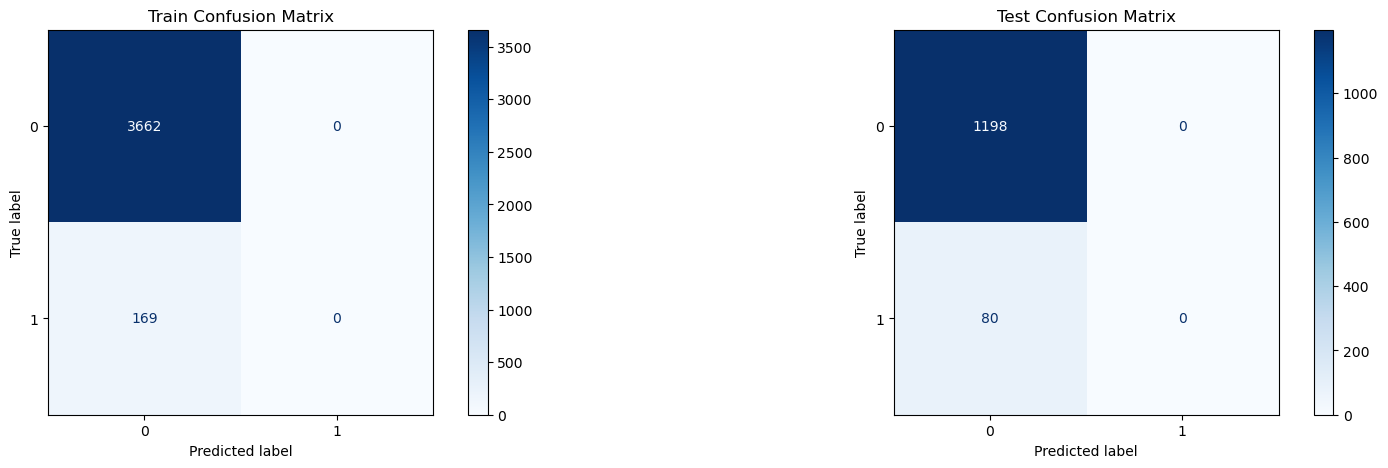

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Logistic Regression Tuned,0.955886,0.0,0.0,0.0,0.937402,0.0,0.0,0.0


In [34]:
evaluate_classification(lr_grid_search, X_train, y_train, X_test, y_test,
                             name='Logistic Regression Tuned')

In [35]:
# now lets use RandomForestRegressor with given hyper parametors
rf_grid_model ={
 'randomforestclassifier__max_features': ['auto', 'sqrt'],
 'randomforestclassifier__min_samples_leaf': [3,15,20],
 'randomforestclassifier__min_samples_split': [2, 10, 100]}

random_forest_model = RandomForestClassifier(random_state=42)
rf_grid_pipe = make_pipeline(pca_pipe, random_forest_model)
rf_grid_search = GridSearchCV(rf_grid_pipe, rf_grid_model)
rf_grid_search.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

GridSearchCV(estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('columntransformer',
                                                         ColumnTransformer(transformers=[('pipeline-1',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('standardscaler',
                                                                                                           StandardScaler())]),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x1698884c0>),
                                                                                         ('pipeline-2',
                                                                                          Pipeline(steps=[('simpleimputer',
                                                                                                           Si...
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x169888130>)])),
                                                        ('pca',
                                                         PCA(n_components=0.95))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_features': ['auto',
                                                                  'sqrt'],
                         'randomforestclassifier__min_samples_leaf': [3, 15,
                                                                      20],
                         'randomforestclassifier__min_samples_split': [2, 10,
                                                                       100]})

======Train Set Metrics======
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3662
           1       0.00      0.00      0.00       169

    accuracy                           0.96      3831
   macro avg       0.48      0.50      0.49      3831
weighted avg       0.91      0.96      0.93      3831

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.00      0.00      0.00        80

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.48      1278
weighted avg       0.88      0.94      0.91      1278



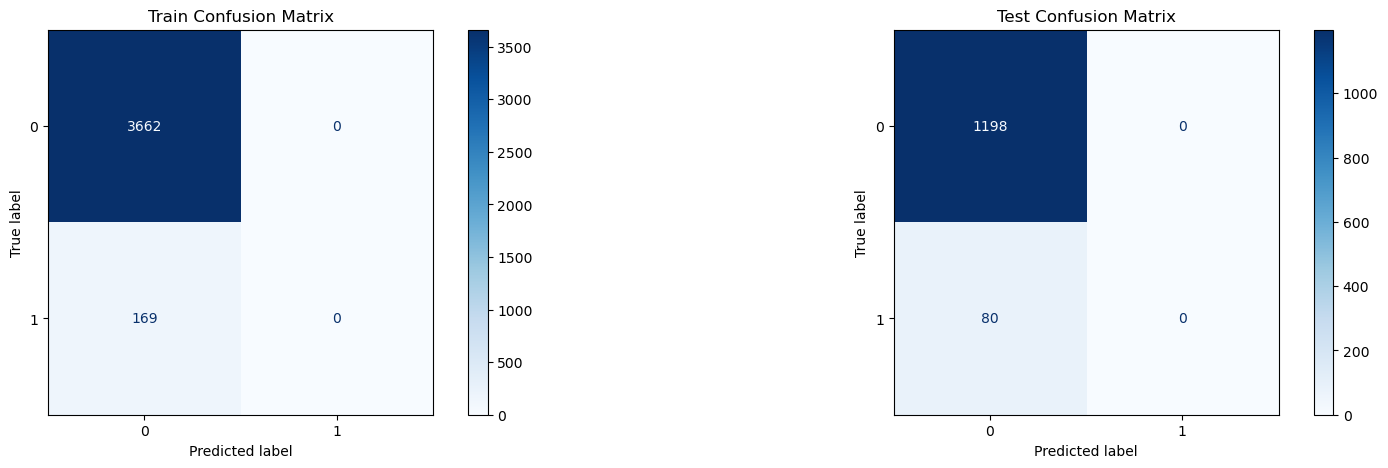

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
Random Forest Tuned,0.955886,0.0,0.0,0.0,0.937402,0.0,0.0,0.0


In [36]:
evaluate_classification(rf_grid_search, X_train, y_train, X_test, y_test,
                             name='Random Forest Tuned')


In [37]:
from xgboost import XGBClassifier
# Lets create another model
xgb = XGBClassifier()
xgb_pipe = make_pipeline(pca_pipe, xgb)
xgb_pipe.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:11:49] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x1698884c0>),
                                                                  ('pipeline-2',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='m...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

======Train Set Metrics======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3662
           1       1.00      1.00      1.00       169

    accuracy                           1.00      3831
   macro avg       1.00      1.00      1.00      3831
weighted avg       1.00      1.00      1.00      3831

======Test Set Metrics======
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1198
           1       0.33      0.01      0.02        80

    accuracy                           0.94      1278
   macro avg       0.64      0.51      0.50      1278
weighted avg       0.90      0.94      0.91      1278



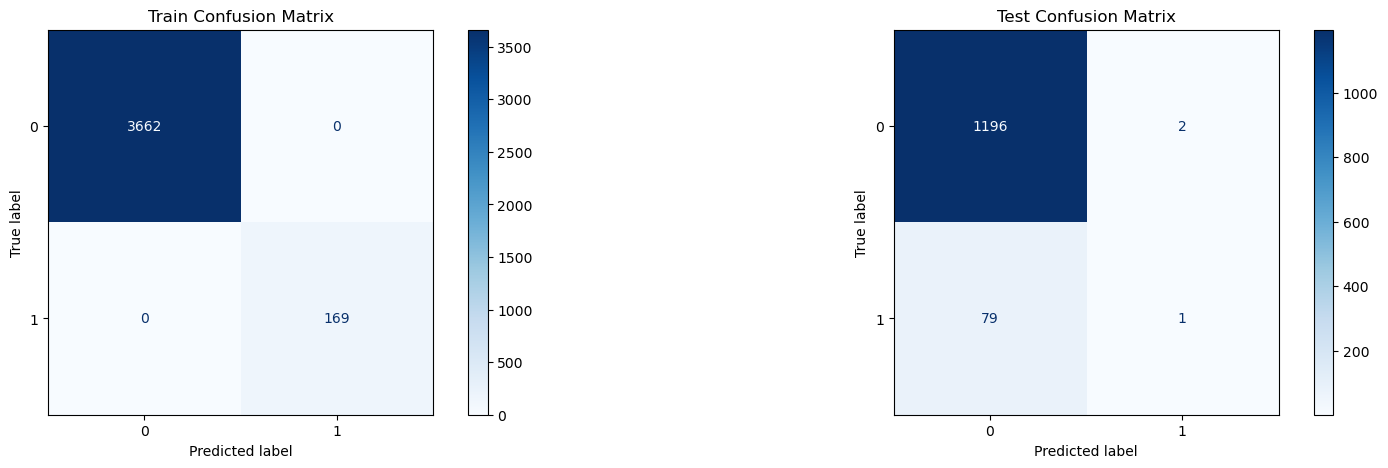

,Train Accuracy,Train Recall,Train Precision,Train F1-Score,Test Accuracy,Test Recall,Test Precision,Test F1-Score
XGBoost,1.0,1.0,1.0,1.0,0.93662,0.0125,0.333333,0.024096


In [38]:
## Display the Model's metrics
evaluate_classification(xgb_pipe, X_train, y_train, X_test, y_test, name='XGBoost')

### For this project LinearRegression and Random Forest models gave us same scores after nice data cleaning!